In [276]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend as K


In [277]:
#reading the data

data = pd.read_csv('allvariables2.csv')
data.head()


,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC
0,14,2004,1,6936,12.42790,853,9,76,65,55,21,25,80,28,5.0,0.0,3.0
1,15,2004,2,5411,9.33284,500,5,69,56,39,16,19,71,19,4.0,0.0,2.0
2,16,2004,3,4329,6.00601,257,3,63,55,31,14,31,30,15,3.0,0.0,3.0
3,17,2004,4,4166,3.98464,163,3,59,49,28,16,15,35,16,6.0,33.0,1.0
4,18,2004,5,3661,2.92270,105,2,50,49,20,16,15,26,16,5.0,0.0,1.0


In [278]:
tots = pd.Series(data['TOTAL A']+data['TOTAL B'],name='total cases')
#data['FLU']=data['FLU'].replace('<1',0)

# data['CC']=data['CC'].replace('<1',0)
# data['FLU_SYMP']=data['FLU_SYMP'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)
# data['OSELT']=data['OSELT'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)

for column in data:
    data[column] = data[column].replace('<1',0)
    data[column]=data[column].astype(float)
data['SUM'] = data['CC']+data['COUGH']+data['FLU_SYMP']+data['FLU']+data['GRIPE']+data['INF_SYMP']+data['INFL']+data['OSELT']+data['PREV']+data['VACC']
data['AVG'] = data['SUM']/10
df = pd.Series()
for i in range(len(data)):
    if data['WEEK'].iloc[i]<=16:
        df=df.append(pd.Series(True))
    elif data['WEEK'].iloc[i]>=40:
        df=df.append(pd.Series(True))
    else:
        df=df.append(pd.Series(False))
df.reset_index(drop=True,inplace=True)
data['SZN']=df
data['SZN'] = data['SZN'].replace(True,1)
data['SZN'] = data['SZN'].replace(False,0)

import math
sines = pd.Series()
cos = pd.Series()
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i*0.04)*40))
    cos = cos.append(pd.Series(math.cos(i*0.04)*40))

cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:"cos"})

sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)
data=data.rename(columns={0:"sines"})

data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,...,INF_SYMP,INFL,OSELT,PREV,VACC,SUM,AVG,SZN,cos,sines
0,14.0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,...,80.0,28.0,5.0,0.0,3.0,358.0,35.8,1.0,40.000000,0.000000
1,15.0,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,...,71.0,19.0,4.0,0.0,2.0,295.0,29.5,1.0,39.968004,1.599573
2,16.0,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,...,30.0,15.0,3.0,0.0,3.0,245.0,24.5,1.0,39.872068,3.196588
3,17.0,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,...,35.0,16.0,6.0,33.0,1.0,258.0,25.8,1.0,39.712345,4.788488
4,18.0,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,...,26.0,16.0,5.0,0.0,1.0,198.0,19.8,1.0,39.489091,6.372728


In [346]:
#inputFeature
x=['CC','SUM','COUGH','COUGH','FLU_SYMP','FLU','GRIPE','INF_SYMP','INFL','OSELT','SZN']
#TargetValue
Xi = data[x]
y = ['PERCENT POSITIVE']
yi = data[y]


In [347]:
#scaling the data: Since it is not normaly distributed we use MinMaxScaler if not we could have used an Standard Scaler
sc= MinMaxScaler()
X= sc.fit_transform(Xi)
#y= yi.values.reshape(-1,1)
y=sc.fit_transform(yi)


In [348]:
X_train = Xi.loc[0:468]
y_train = yi.loc[0:468]
X_test = Xi.loc[469:625]
y_test = yi.loc[469:625]

In [349]:
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred -y_true), axis=-1))

In [350]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=10, input_dim=11,kernel_initializer='normal',activation='relu'))
    regressor.add(Dense(units=9, input_dim=10,kernel_initializer='normal',activation='exponential'))
    regressor.add(Dense(units=1, input_dim=10,kernel_initializer='normal',activation='relu'))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy',rmse])
    return regressor

In [351]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=1000)

In [352]:
results=regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

Epoch 1/1000
469/469 [==============================] - 4s 9ms/step - loss: 261.8003 - mean_absolute_error: 8.5468 - acc: 0.0043 - rmse: 8.5468 
Epoch 2/1000
469/469 [==============================] - 0s 106us/step - loss: 172.3986 - mean_absolute_error: 8.2001 - acc: 0.0000e+00 - rmse: 8.2001
Epoch 3/1000
469/469 [==============================] - 0s 104us/step - loss: 133.9524 - mean_absolute_error: 7.1644 - acc: 0.0000e+00 - rmse: 7.1644
Epoch 4/1000
469/469 [==============================] - 0s 108us/step - loss: 124.3104 - mean_absolute_error: 6.8750 - acc: 0.0000e+00 - rmse: 6.8750
Epoch 5/1000
469/469 [==============================] - 0s 106us/step - loss: 117.4726 - mean_absolute_error: 6.9200 - acc: 0.0000e+00 - rmse: 6.9200
Epoch 6/1000
469/469 [==============================] - 0s 102us/step - loss: 108.3233 - mean_absolute_error: 6.7398 - acc: 0.0000e+00 - rmse: 6.7398
Epoch 7/1000
469/469 [==============================] - 0s 104us/step - loss: 104.7327 - mean_absolute_er

469/469 [==============================] - 0s 109us/step - loss: 71.8305 - mean_absolute_error: 6.2551 - acc: 0.0000e+00 - rmse: 6.2551
Epoch 110/1000
469/469 [==============================] - 0s 104us/step - loss: 72.5598 - mean_absolute_error: 6.3071 - acc: 0.0000e+00 - rmse: 6.3071
Epoch 111/1000
469/469 [==============================] - 0s 114us/step - loss: 72.1174 - mean_absolute_error: 6.2711 - acc: 0.0000e+00 - rmse: 6.2711
Epoch 112/1000
469/469 [==============================] - 0s 115us/step - loss: 71.5080 - mean_absolute_error: 6.2646 - acc: 0.0000e+00 - rmse: 6.2646
Epoch 113/1000
469/469 [==============================] - 0s 123us/step - loss: 71.2731 - mean_absolute_error: 6.2523 - acc: 0.0000e+00 - rmse: 6.2523
Epoch 114/1000
469/469 [==============================] - 0s 111us/step - loss: 72.0275 - mean_absolute_error: 6.3162 - acc: 0.0000e+00 - rmse: 6.3162
Epoch 115/1000
469/469 [==============================] - 0s 116us/step - loss: 71.6149 - mean_absolute_error

469/469 [==============================] - 0s 110us/step - loss: 66.6602 - mean_absolute_error: 6.1637 - acc: 0.0000e+00 - rmse: 6.1637
Epoch 218/1000
469/469 [==============================] - 0s 108us/step - loss: 65.6536 - mean_absolute_error: 6.1607 - acc: 0.0000e+00 - rmse: 6.1607
Epoch 219/1000
469/469 [==============================] - 0s 117us/step - loss: 65.7775 - mean_absolute_error: 6.1814 - acc: 0.0000e+00 - rmse: 6.1814
Epoch 220/1000
469/469 [==============================] - 0s 108us/step - loss: 65.8697 - mean_absolute_error: 6.1823 - acc: 0.0000e+00 - rmse: 6.1823
Epoch 221/1000
469/469 [==============================] - 0s 105us/step - loss: 65.6463 - mean_absolute_error: 6.1532 - acc: 0.0000e+00 - rmse: 6.1532
Epoch 222/1000
469/469 [==============================] - 0s 97us/step - loss: 65.6215 - mean_absolute_error: 6.1558 - acc: 0.0000e+00 - rmse: 6.1558
Epoch 223/1000
469/469 [==============================] - 0s 105us/step - loss: 65.5251 - mean_absolute_error:

469/469 [==============================] - 0s 112us/step - loss: 60.0819 - mean_absolute_error: 5.8807 - acc: 0.0000e+00 - rmse: 5.8807
Epoch 326/1000
469/469 [==============================] - 0s 116us/step - loss: 61.2953 - mean_absolute_error: 5.9072 - acc: 0.0000e+00 - rmse: 5.9072
Epoch 327/1000
469/469 [==============================] - 0s 113us/step - loss: 59.9739 - mean_absolute_error: 5.8640 - acc: 0.0000e+00 - rmse: 5.8640
Epoch 328/1000
469/469 [==============================] - 0s 112us/step - loss: 60.3886 - mean_absolute_error: 5.8254 - acc: 0.0000e+00 - rmse: 5.8254
Epoch 329/1000
469/469 [==============================] - 0s 103us/step - loss: 60.1708 - mean_absolute_error: 5.8529 - acc: 0.0000e+00 - rmse: 5.8529
Epoch 330/1000
469/469 [==============================] - 0s 101us/step - loss: 59.6042 - mean_absolute_error: 5.8015 - acc: 0.0000e+00 - rmse: 5.8015
Epoch 331/1000
469/469 [==============================] - 0s 100us/step - loss: 61.5080 - mean_absolute_error

469/469 [==============================] - 0s 107us/step - loss: 57.8893 - mean_absolute_error: 5.6729 - acc: 0.0000e+00 - rmse: 5.6729
Epoch 434/1000
469/469 [==============================] - 0s 111us/step - loss: 59.4629 - mean_absolute_error: 5.6650 - acc: 0.0000e+00 - rmse: 5.6650
Epoch 435/1000
469/469 [==============================] - 0s 115us/step - loss: 53.9947 - mean_absolute_error: 5.3747 - acc: 0.0000e+00 - rmse: 5.3747
Epoch 436/1000
469/469 [==============================] - 0s 111us/step - loss: 53.3414 - mean_absolute_error: 5.4086 - acc: 0.0000e+00 - rmse: 5.4086
Epoch 437/1000
469/469 [==============================] - 0s 113us/step - loss: 53.7837 - mean_absolute_error: 5.4073 - acc: 0.0000e+00 - rmse: 5.4073
Epoch 438/1000
469/469 [==============================] - 0s 122us/step - loss: 53.6626 - mean_absolute_error: 5.4092 - acc: 0.0000e+00 - rmse: 5.4092
Epoch 439/1000
469/469 [==============================] - 0s 105us/step - loss: 53.5335 - mean_absolute_error

469/469 [==============================] - 0s 109us/step - loss: 49.6036 - mean_absolute_error: 5.2920 - acc: 0.0000e+00 - rmse: 5.2920
Epoch 542/1000
469/469 [==============================] - 0s 104us/step - loss: 48.0394 - mean_absolute_error: 5.2307 - acc: 0.0000e+00 - rmse: 5.2307
Epoch 543/1000
469/469 [==============================] - 0s 100us/step - loss: 48.1694 - mean_absolute_error: 5.3206 - acc: 0.0000e+00 - rmse: 5.3206
Epoch 544/1000
469/469 [==============================] - 0s 106us/step - loss: 47.2038 - mean_absolute_error: 5.2128 - acc: 0.0000e+00 - rmse: 5.2128
Epoch 545/1000
469/469 [==============================] - 0s 108us/step - loss: 48.4674 - mean_absolute_error: 5.2667 - acc: 0.0000e+00 - rmse: 5.2667
Epoch 546/1000
469/469 [==============================] - 0s 111us/step - loss: 47.8400 - mean_absolute_error: 5.1635 - acc: 0.0000e+00 - rmse: 5.1635
Epoch 547/1000
469/469 [==============================] - 0s 114us/step - loss: 49.8117 - mean_absolute_error

469/469 [==============================] - 0s 127us/step - loss: 41.4456 - mean_absolute_error: 4.9342 - acc: 0.0000e+00 - rmse: 4.9342
Epoch 650/1000
469/469 [==============================] - 0s 115us/step - loss: 40.4171 - mean_absolute_error: 4.9425 - acc: 0.0000e+00 - rmse: 4.9425
Epoch 651/1000
469/469 [==============================] - 0s 107us/step - loss: 41.8396 - mean_absolute_error: 5.0055 - acc: 0.0000e+00 - rmse: 5.0055
Epoch 652/1000
469/469 [==============================] - 0s 108us/step - loss: 41.2491 - mean_absolute_error: 4.9885 - acc: 0.0000e+00 - rmse: 4.9885
Epoch 653/1000
469/469 [==============================] - 0s 107us/step - loss: 40.7357 - mean_absolute_error: 4.9485 - acc: 0.0000e+00 - rmse: 4.9485
Epoch 654/1000
469/469 [==============================] - 0s 106us/step - loss: 40.8274 - mean_absolute_error: 4.8968 - acc: 0.0000e+00 - rmse: 4.8968
Epoch 655/1000
469/469 [==============================] - 0s 110us/step - loss: 40.7850 - mean_absolute_error

469/469 [==============================] - 0s 107us/step - loss: 34.8379 - mean_absolute_error: 4.5812 - acc: 0.0000e+00 - rmse: 4.5812
Epoch 758/1000
469/469 [==============================] - 0s 109us/step - loss: 33.4922 - mean_absolute_error: 4.4824 - acc: 0.0000e+00 - rmse: 4.4824
Epoch 759/1000
469/469 [==============================] - 0s 113us/step - loss: 33.2151 - mean_absolute_error: 4.4830 - acc: 0.0000e+00 - rmse: 4.4830
Epoch 760/1000
469/469 [==============================] - 0s 119us/step - loss: 32.6985 - mean_absolute_error: 4.4785 - acc: 0.0000e+00 - rmse: 4.4785
Epoch 761/1000
469/469 [==============================] - 0s 115us/step - loss: 33.5254 - mean_absolute_error: 4.4511 - acc: 0.0000e+00 - rmse: 4.4511
Epoch 762/1000
469/469 [==============================] - 0s 103us/step - loss: 33.9349 - mean_absolute_error: 4.4607 - acc: 0.0000e+00 - rmse: 4.4607
Epoch 763/1000
469/469 [==============================] - 0s 108us/step - loss: 32.7227 - mean_absolute_error

469/469 [==============================] - 0s 112us/step - loss: 48.2715 - mean_absolute_error: 5.0186 - acc: 0.0000e+00 - rmse: 5.0186
Epoch 866/1000
469/469 [==============================] - 0s 114us/step - loss: 48.3144 - mean_absolute_error: 5.0278 - acc: 0.0000e+00 - rmse: 5.0278
Epoch 867/1000
469/469 [==============================] - 0s 111us/step - loss: 48.9851 - mean_absolute_error: 5.0495 - acc: 0.0000e+00 - rmse: 5.0495
Epoch 868/1000
469/469 [==============================] - 0s 131us/step - loss: 48.8291 - mean_absolute_error: 5.0092 - acc: 0.0000e+00 - rmse: 5.0092
Epoch 869/1000
469/469 [==============================] - 0s 135us/step - loss: 48.7080 - mean_absolute_error: 5.0451 - acc: 0.0000e+00 - rmse: 5.0451
Epoch 870/1000
469/469 [==============================] - 0s 129us/step - loss: 48.4801 - mean_absolute_error: 5.0340 - acc: 0.0000e+00 - rmse: 5.0340
Epoch 871/1000
469/469 [==============================] - 0s 109us/step - loss: 48.2666 - mean_absolute_error

469/469 [==============================] - 0s 134us/step - loss: 46.7132 - mean_absolute_error: 5.0996 - acc: 0.0000e+00 - rmse: 5.0996
Epoch 974/1000
469/469 [==============================] - 0s 116us/step - loss: 48.4423 - mean_absolute_error: 5.0981 - acc: 0.0000e+00 - rmse: 5.0981
Epoch 975/1000
469/469 [==============================] - 0s 103us/step - loss: 50.2730 - mean_absolute_error: 5.1709 - acc: 0.0000e+00 - rmse: 5.1709
Epoch 976/1000
469/469 [==============================] - 0s 106us/step - loss: 68.0189 - mean_absolute_error: 5.7330 - acc: 0.0000e+00 - rmse: 5.7330
Epoch 977/1000
469/469 [==============================] - 0s 109us/step - loss: 47.8741 - mean_absolute_error: 5.0828 - acc: 0.0000e+00 - rmse: 5.0828
Epoch 978/1000
469/469 [==============================] - 0s 116us/step - loss: 49.1989 - mean_absolute_error: 5.1182 - acc: 0.0000e+00 - rmse: 5.1182
Epoch 979/1000
469/469 [==============================] - 0s 114us/step - loss: 47.8721 - mean_absolute_error

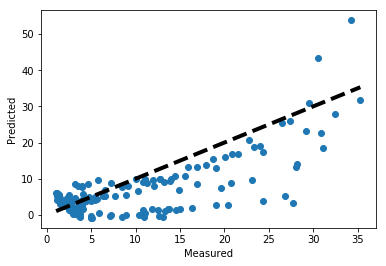

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [0]:
#NEWNeuralNetwork


